## 使用随机森林的方法解决手写数字识别问题

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
digits = load_digits()
X, y = digits.data, digits.target

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1017)

# 创建随机森林分类器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1017)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9666666666666667


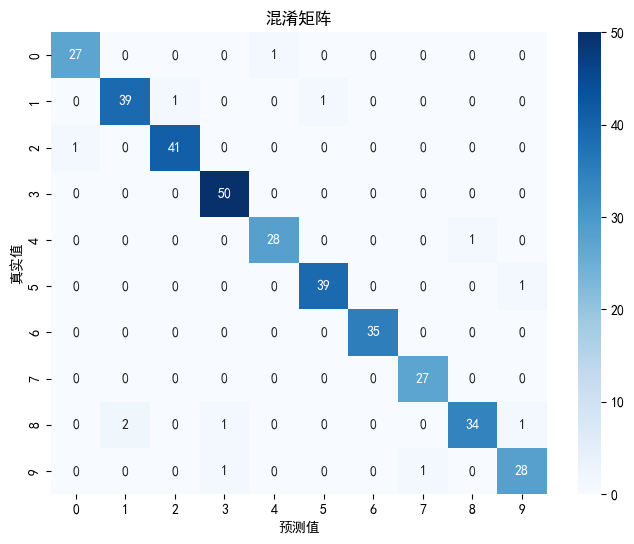

In [3]:
import seaborn as sns

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 使用Seaborn库绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title('混淆矩阵')
plt.xlabel('预测值')
plt.ylabel('真实值')
plt.show()

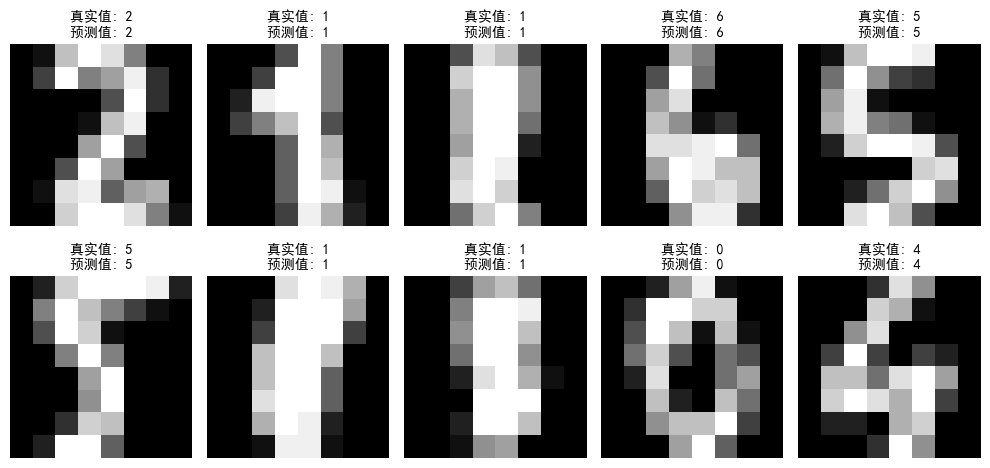

In [4]:
# 可视化一些样本的预测结果
n_samples = 10
indices = np.random.choice(len(X_test), n_samples, replace=False)

plt.figure(figsize=(10, 5))
for i, index in enumerate(indices):
    plt.subplot(2, n_samples//2, i + 1)
    plt.imshow(X_test[index].reshape(8, 8), cmap='gray', interpolation='none')
    plt.title(f'真实值: {y_test[index]}\n预测值: {y_pred[index]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

调整n_estimators参数

In [20]:
rf_classifier_1 = RandomForestClassifier(n_estimators=10, random_state=1017)

rf_classifier_1.fit(X_train, y_train)

y_pred = rf_classifier_1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9465


In [22]:
rf_classifier_2 = RandomForestClassifier(n_estimators=50, random_state=1017)

rf_classifier_2.fit(X_train, y_train)

y_pred = rf_classifier_2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9660714285714286
